# HAT-P-11

In [1]:
import lightkurve as lk
from glob import glob
import ombre as om
import numpy as np
import matplotlib.pyplot as plt

In [2]:
name = 'HAT-P-11'

In [3]:
import lightkurve as lk
clc = lk.search_lightcurve(name, mission='TESS', author='SPOC').download_all().stitch().remove_nans().flatten(1001, sigma=3)

In [4]:
fnames = np.asarray(glob(f'/Users/ch/HST/data/{name}/*.fits'))
obs = om.Observation.from_files(fnames)

In [5]:
obs

HAT-P-11 [11 Visits]

/Users/ch/Library/Caches/pypoetry/virtualenvs/ombre-vf38qw1p-py3.8/lib/python3.8/site-packages/lightkurve/lightcurve.py:943: LightkurveWarning: `epoch_time` appears to be given in JD, however the light curve time uses BTJD (i.e. JD - 2457000).
  warnings.warn(


<AxesSubplot:xlabel='Phase [JD]', ylabel='Normalized Flux'>

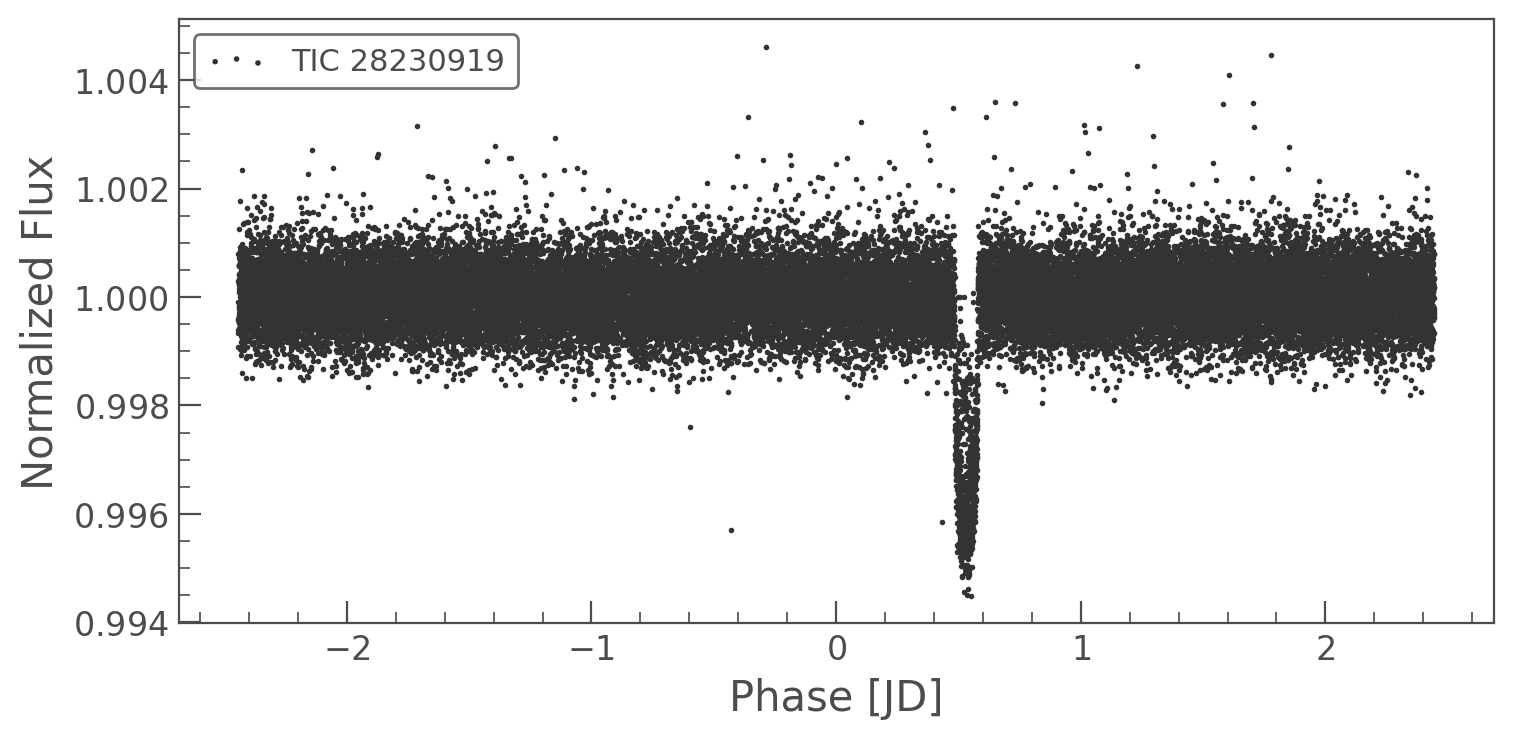

In [6]:
clc.fold(obs.period, obs.t0).scatter()

In [7]:
obs.fit_transit(x_suppl=clc.time.value + 2457000,
                y_suppl=clc.flux.value/np.median(clc.flux.value),
                yerr_suppl=clc.flux_err.value/np.median(clc.flux.value),
                exptime_suppl=np.median(np.diff(clc.time.value)))

<AxesSubplot:xlabel='Phase', ylabel='$e^-s^{-1}$'>

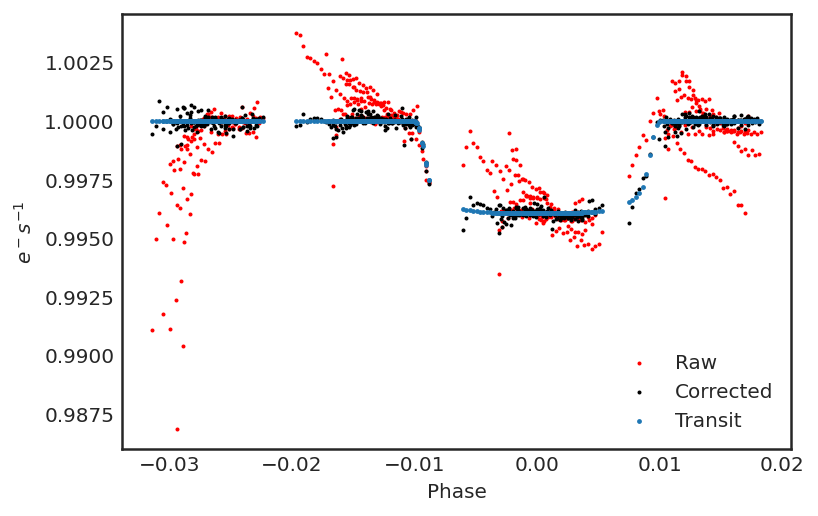

In [8]:
obs.plot()

In [9]:
obs.fit_model()

Fitting Transit/Eclipse Model:   0%|          | 0/11 [00:00<?, ?it/s]

Fitting Transit/Eclipse Model:   9%|▉         | 1/11 [00:36<06:07, 36.70s/it]

Fitting Transit/Eclipse Model:  18%|█▊        | 2/11 [01:00<04:19, 28.89s/it]

Fitting Transit/Eclipse Model:  27%|██▋       | 3/11 [01:24<03:34, 26.84s/it]

Fitting Transit/Eclipse Model:  36%|███▋      | 4/11 [01:50<03:05, 26.48s/it]

Fitting Transit/Eclipse Model:  45%|████▌     | 5/11 [02:16<02:37, 26.18s/it]

Fitting Transit/Eclipse Model:  55%|█████▍    | 6/11 [02:40<02:07, 25.49s/it]

Fitting Transit/Eclipse Model:  64%|██████▎   | 7/11 [03:04<01:40, 25.15s/it]

Fitting Transit/Eclipse Model:  73%|███████▎  | 8/11 [03:30<01:16, 25.50s/it]

Fitting Transit/Eclipse Model:  82%|████████▏ | 9/11 [03:55<00:50, 25.33s/it]

Fitting Transit/Eclipse Model:  91%|█████████ | 10/11 [04:21<00:25, 25.42s/it]

Fitting Transit/Eclipse Model: 100%|██████████| 11/11 [04:45<00:00, 24.84s/it]

Fitting Transit/Eclipse Model: 100%|██████████| 11/11 [04:45<00:00, 25.91s/it]

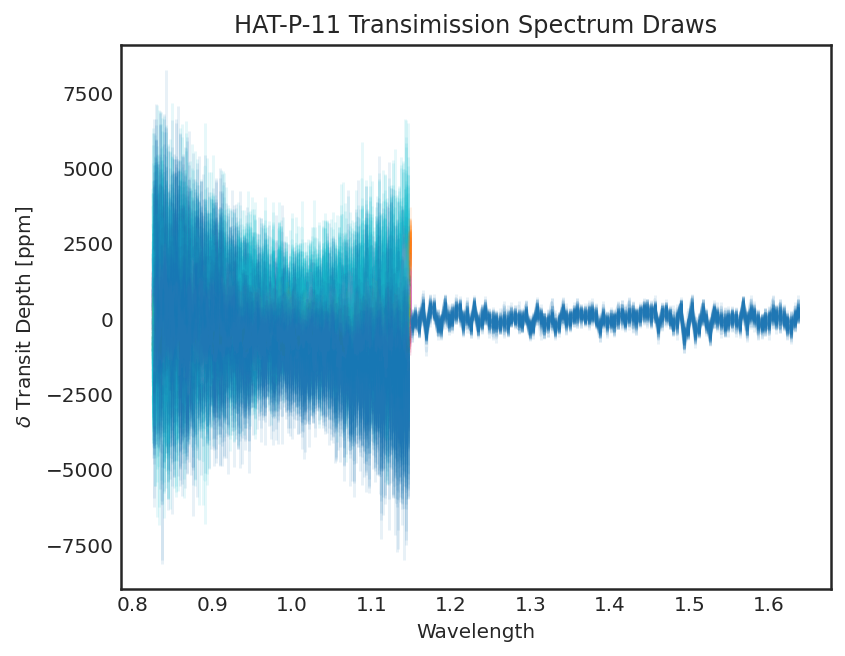

In [10]:
obs.plot_spectra()

<AxesSubplot:title={'center':'HAT-P-11 Transmission Spectrum, Visit: 1'}, xlabel='Wavelength', ylabel='$\\delta$ Transit Depth [ppm]'>

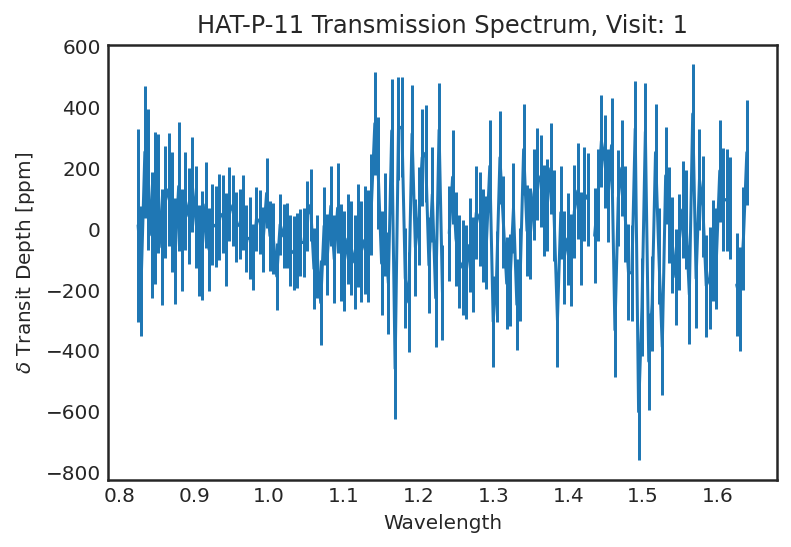

In [11]:
om.Spectra([visit.transmission_spectrum for visit in obs]).flatten().bin(bins=np.linspace(0.8, 1.7, 200)).plot()

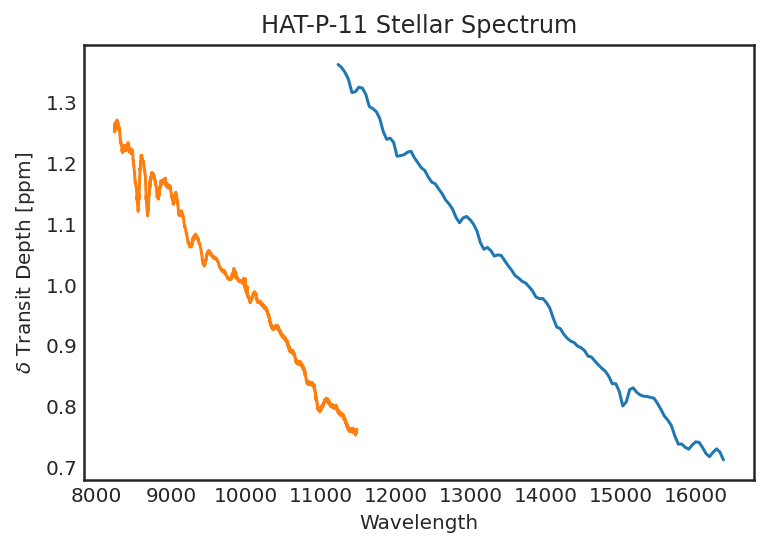

In [12]:
spec = obs.stellar_spectra
spec.plot()
spec.hdulist.writeto(f'results/{name}_stellar_spectrum.fits', overwrite=True)

In [13]:
from astropy.io import fits
try:
    hdulist = om.Spectra([visit.transmission_spectrum for visit in obs if visit.transmission_spectrum.spec.sum() != 0]).hdulist
    hdulist.writeto(f'results/{name}_transmission.fits', overwrite=True)
except:
    pass
try:    
    hdulist = om.Spectra([visit.emission_spectrum for visit in obs if visit.emission_spectrum.spec.sum() != 0]).hdulist
    hdulist.writeto(f'results/{name}_emission.fits', overwrite=True)
except:
    pass

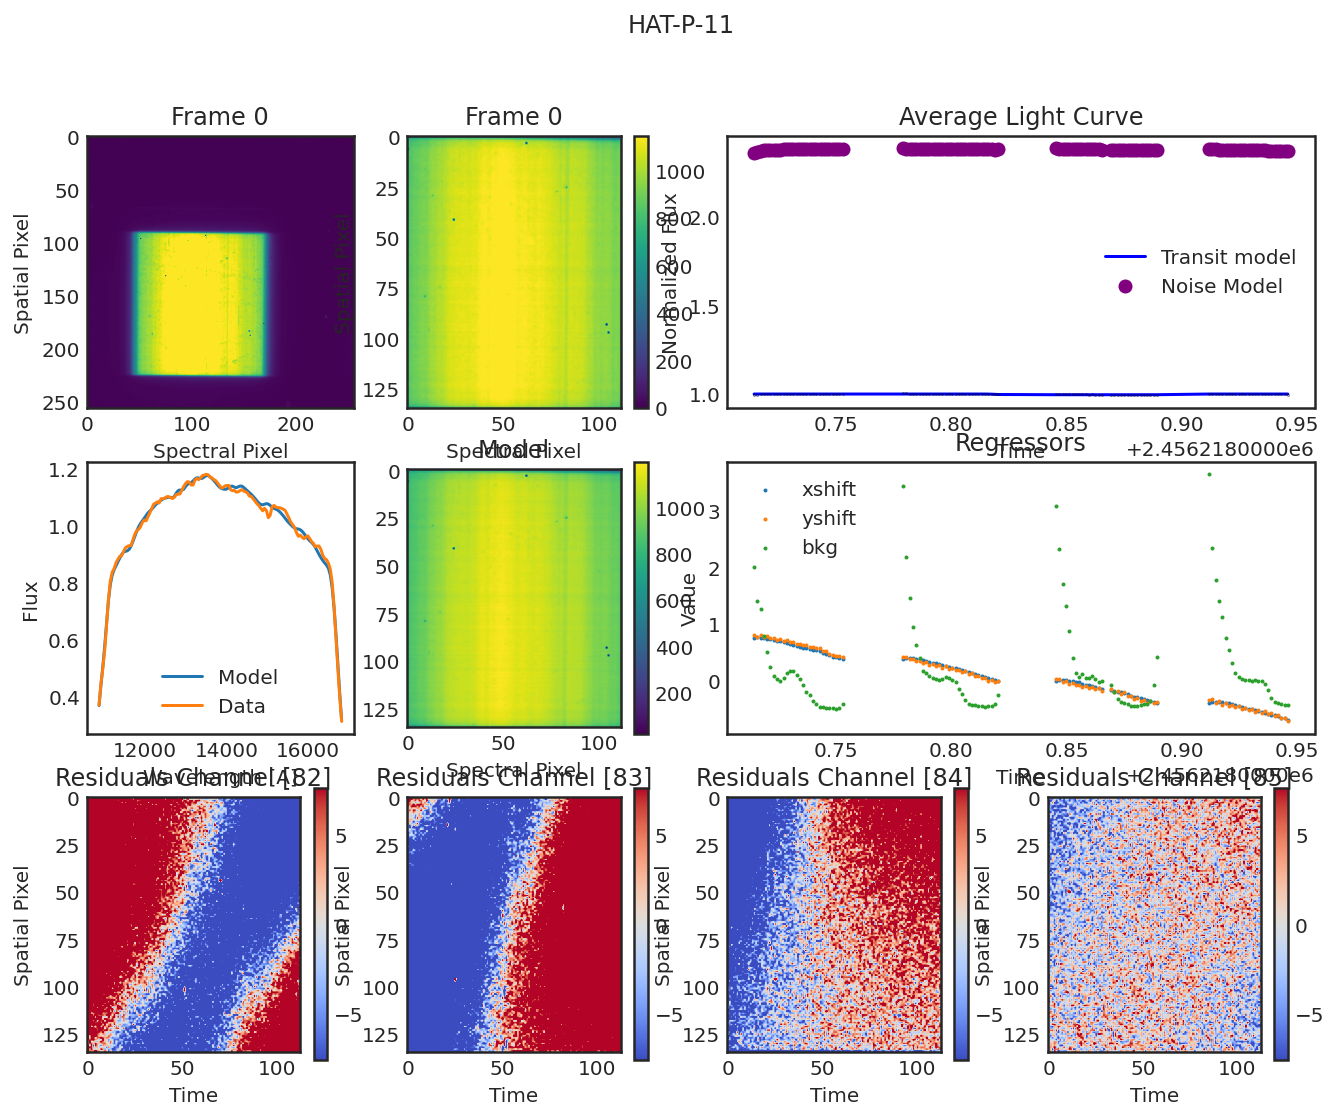

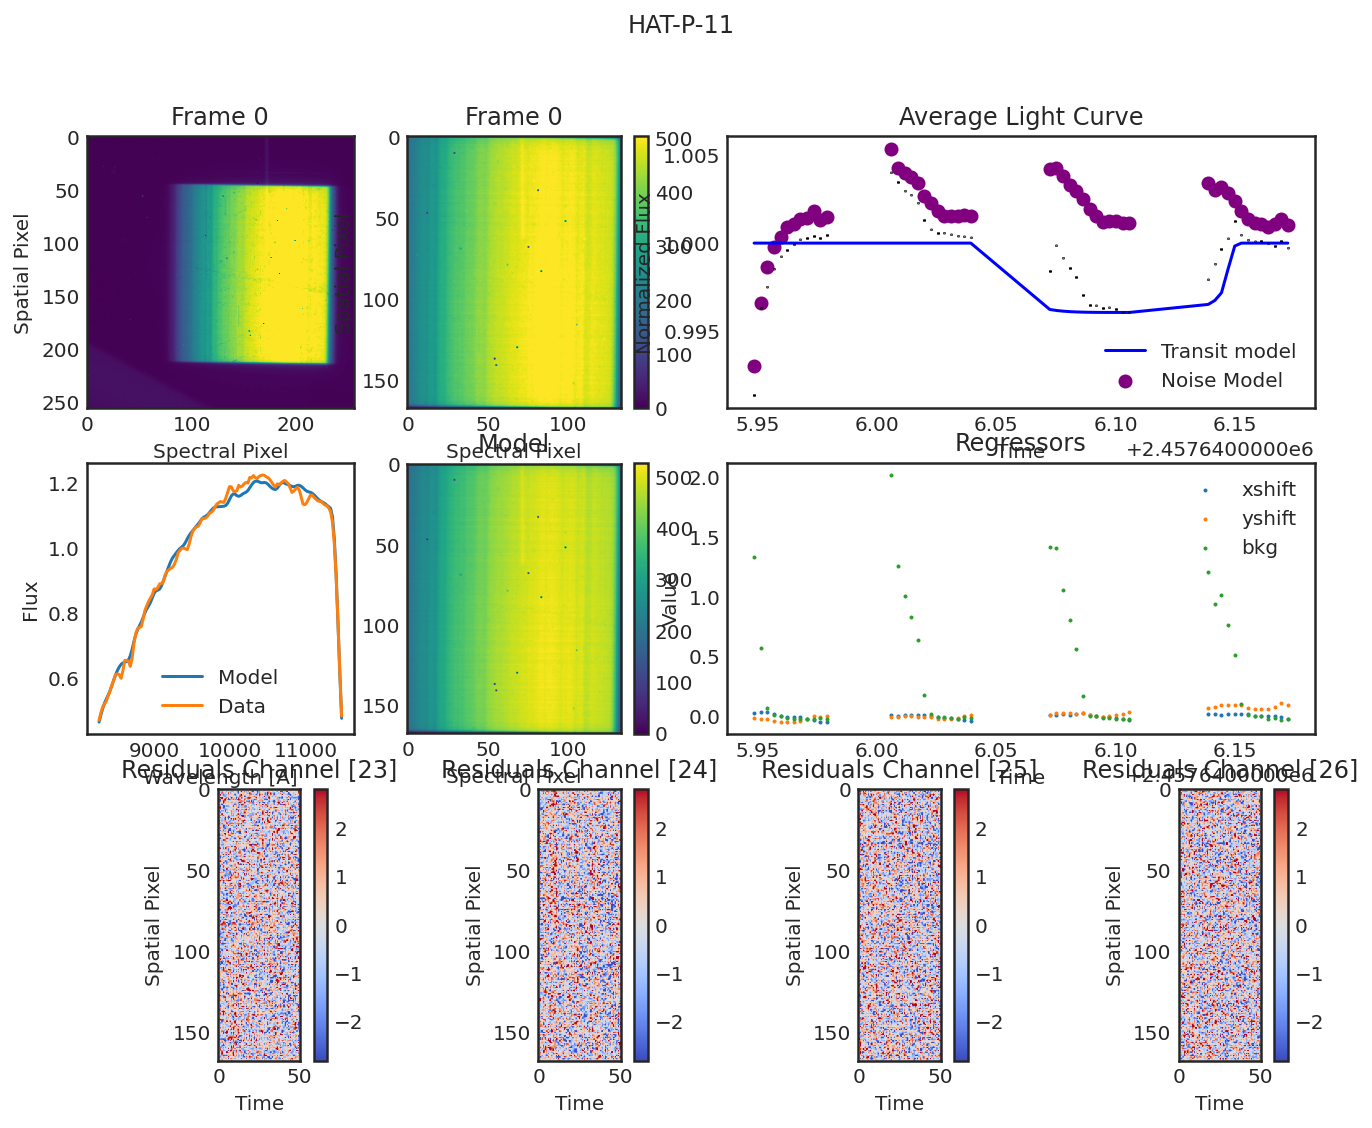

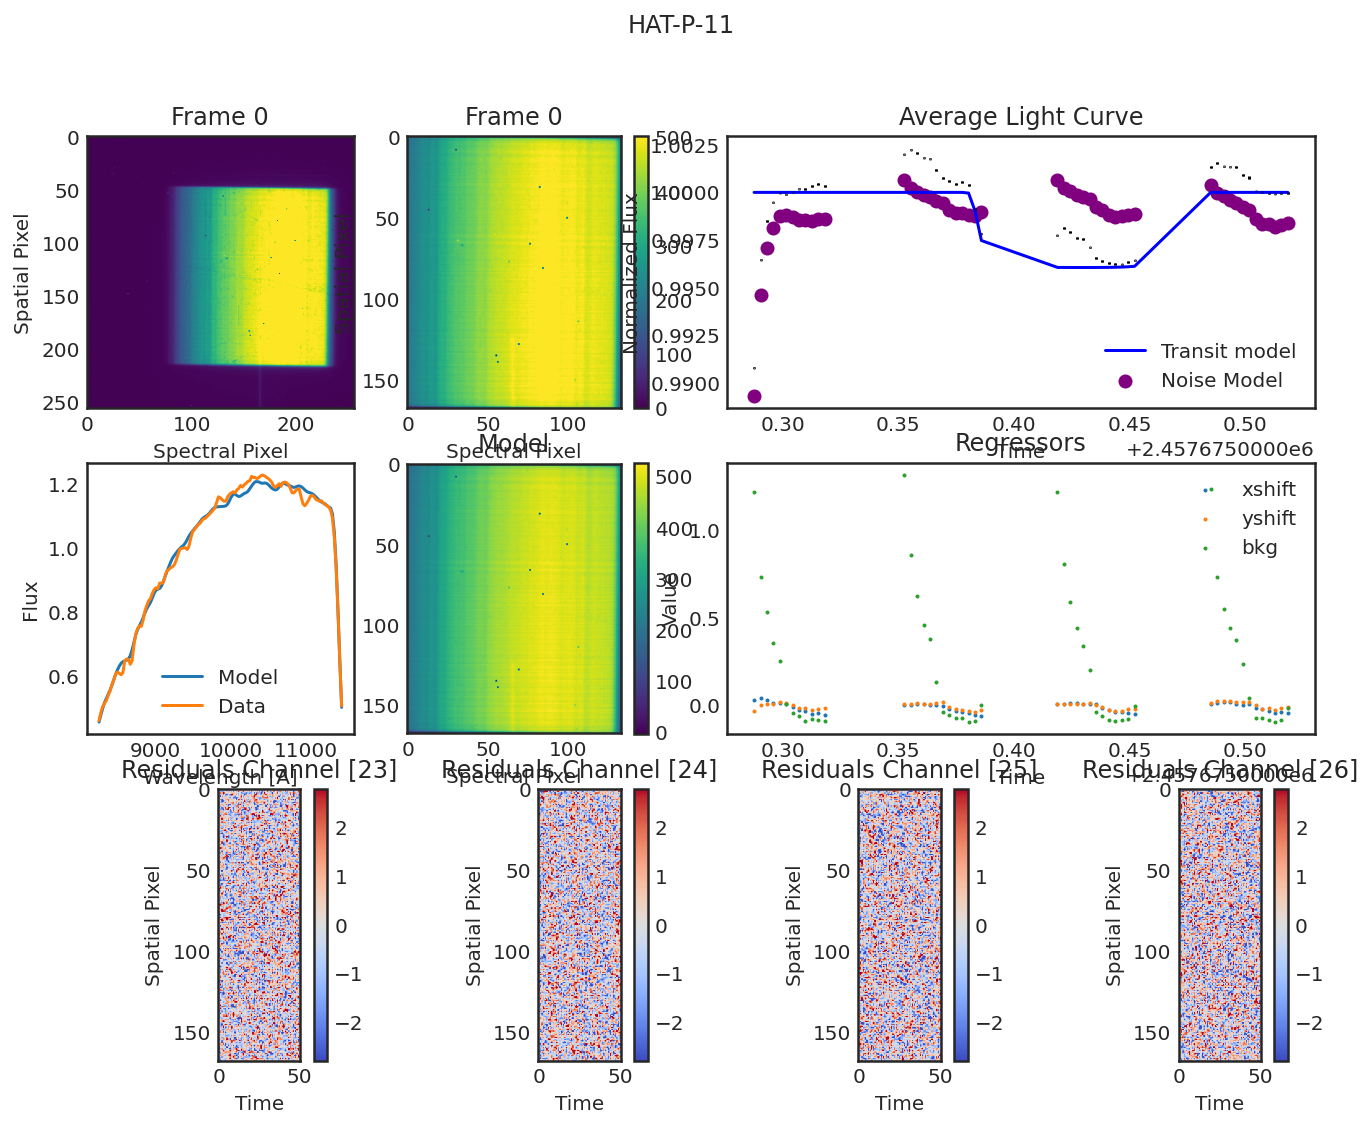

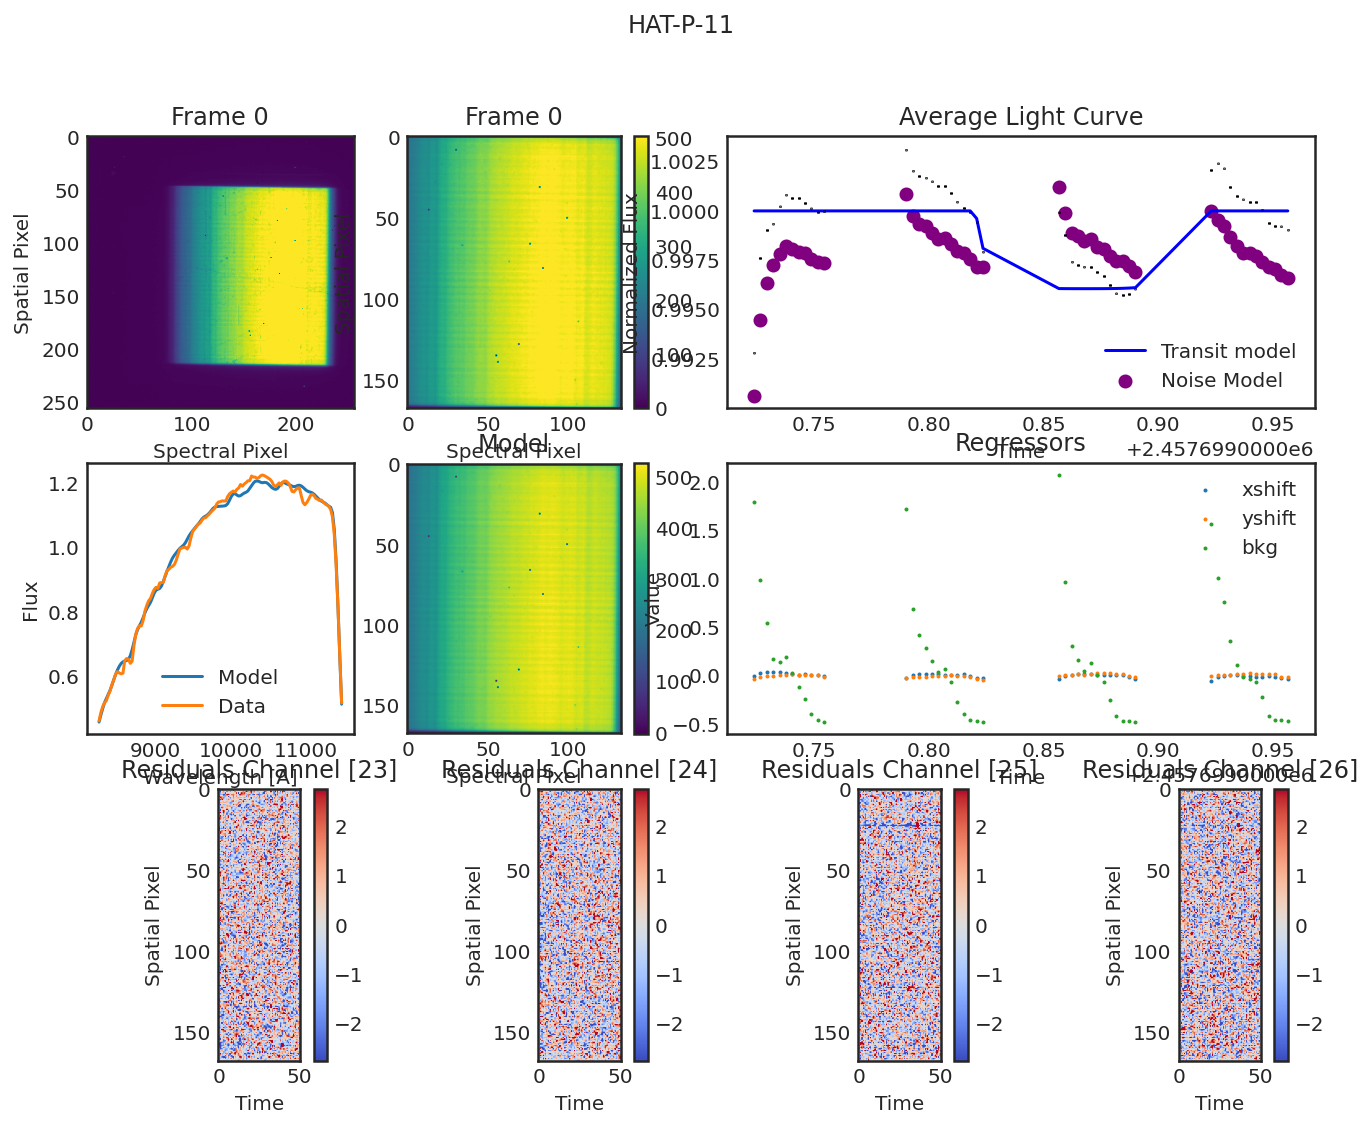

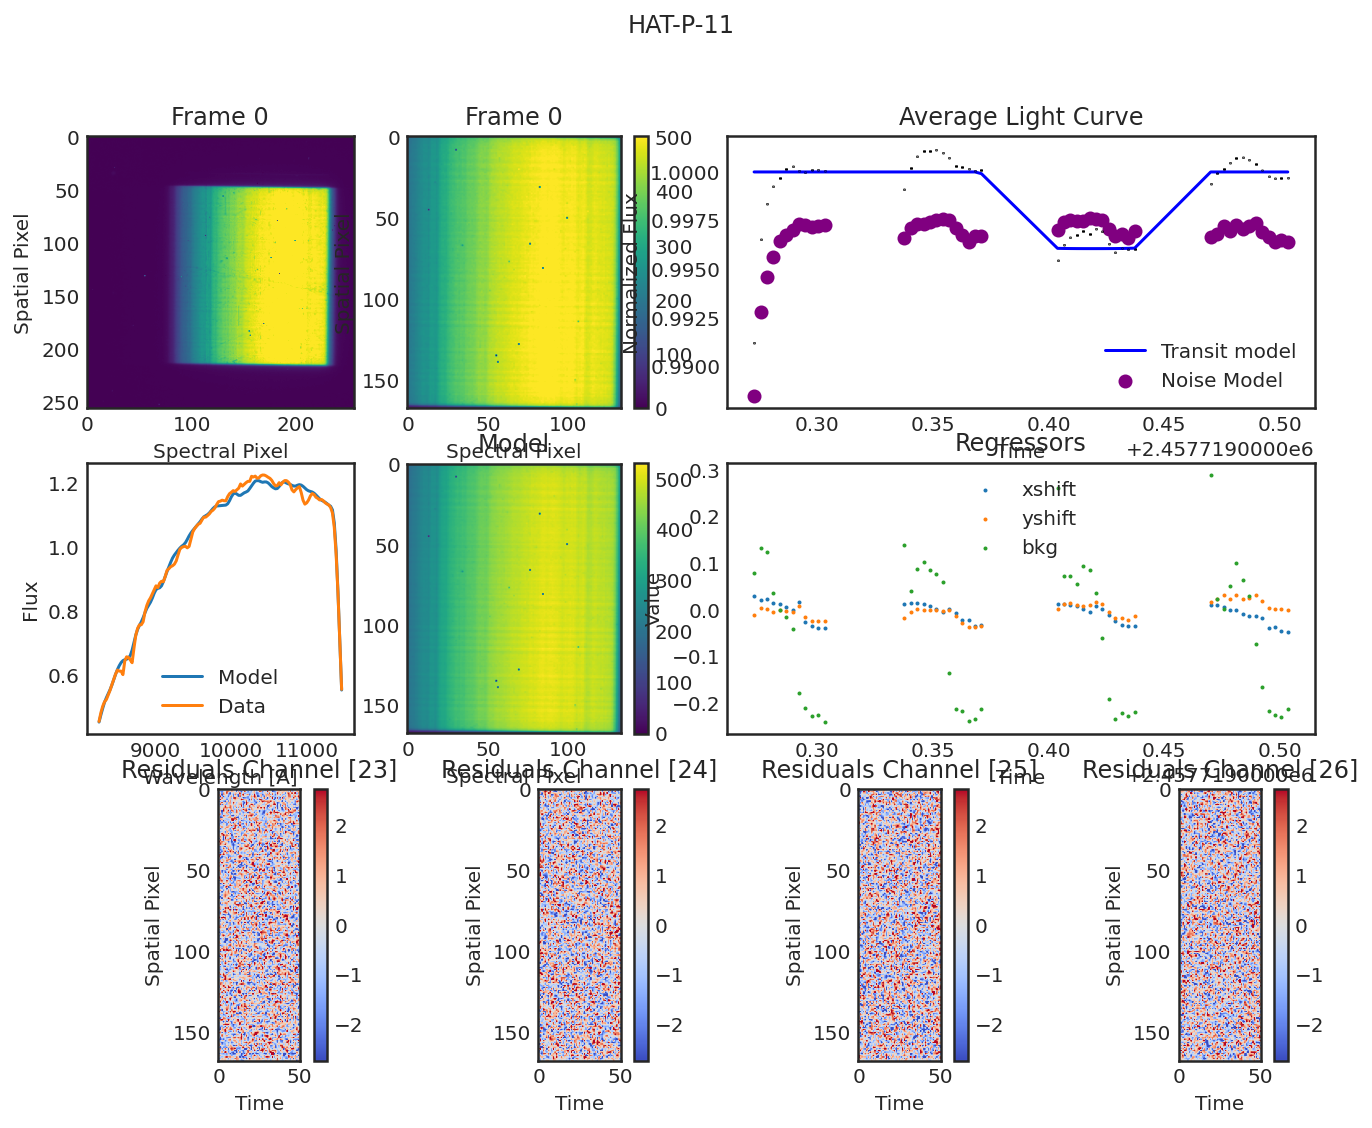

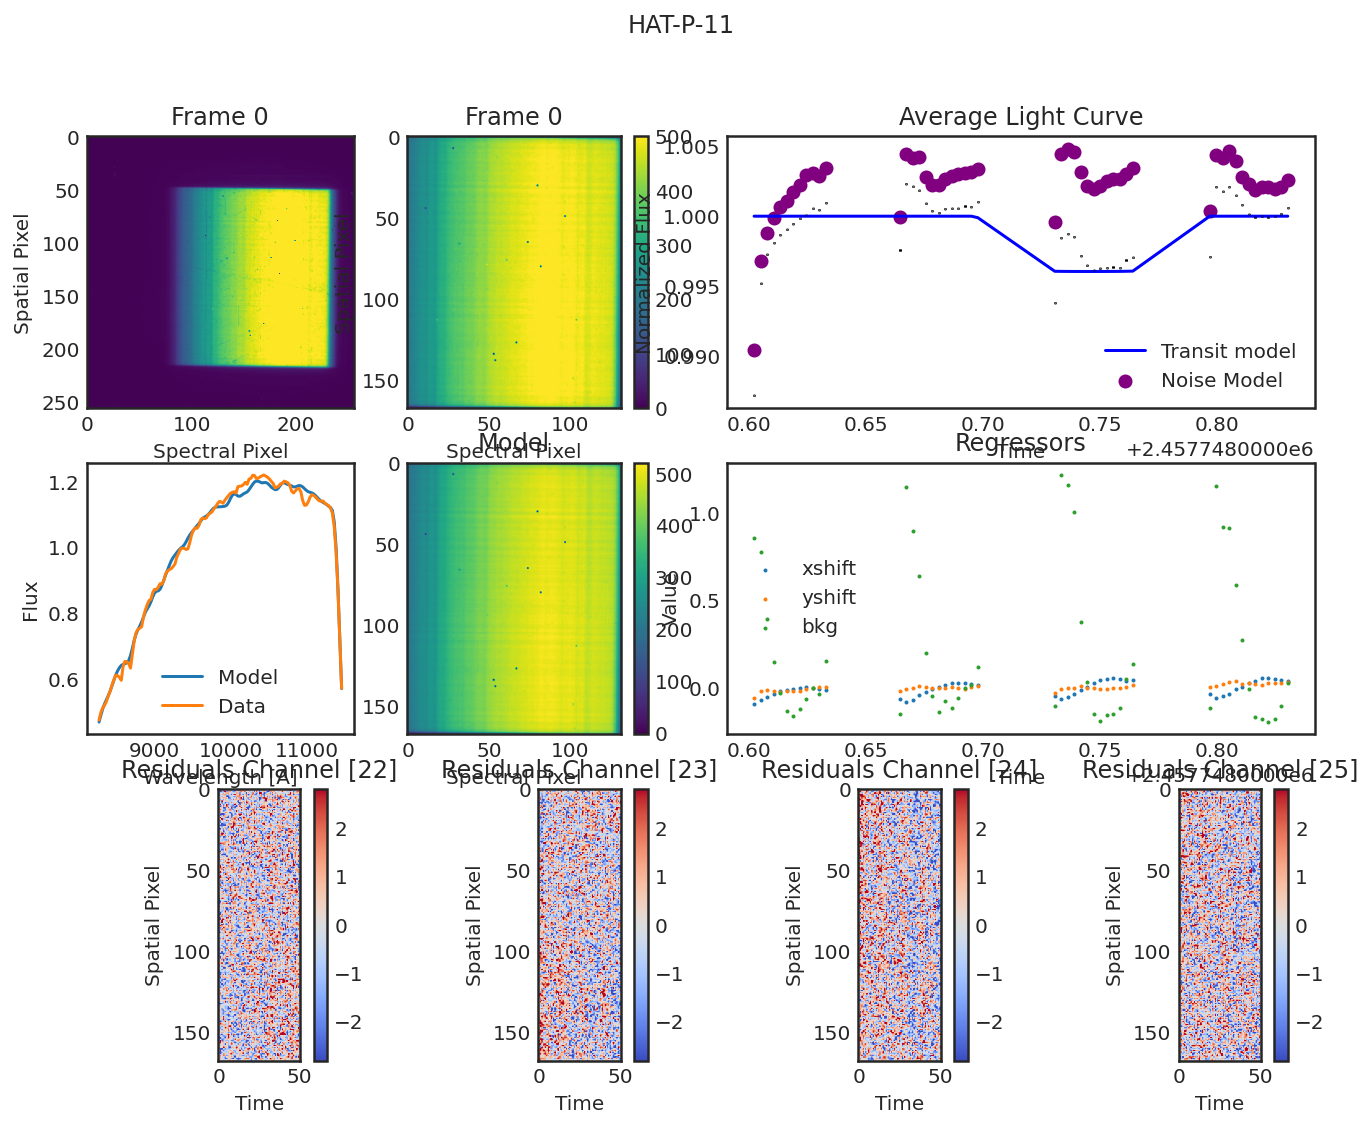

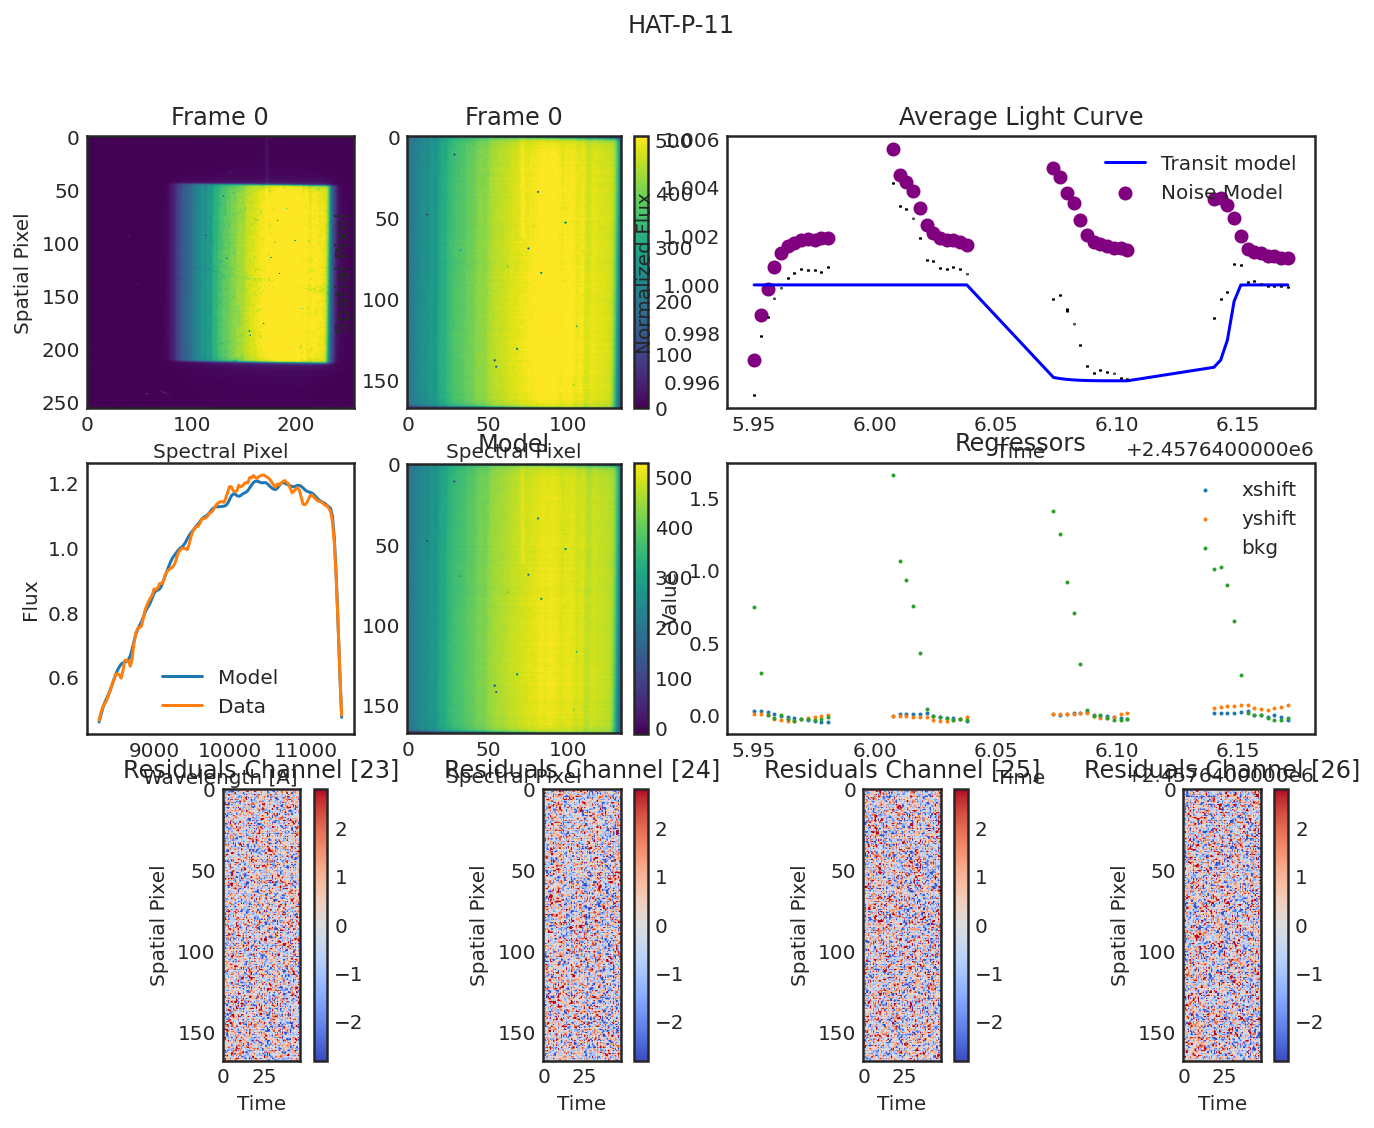

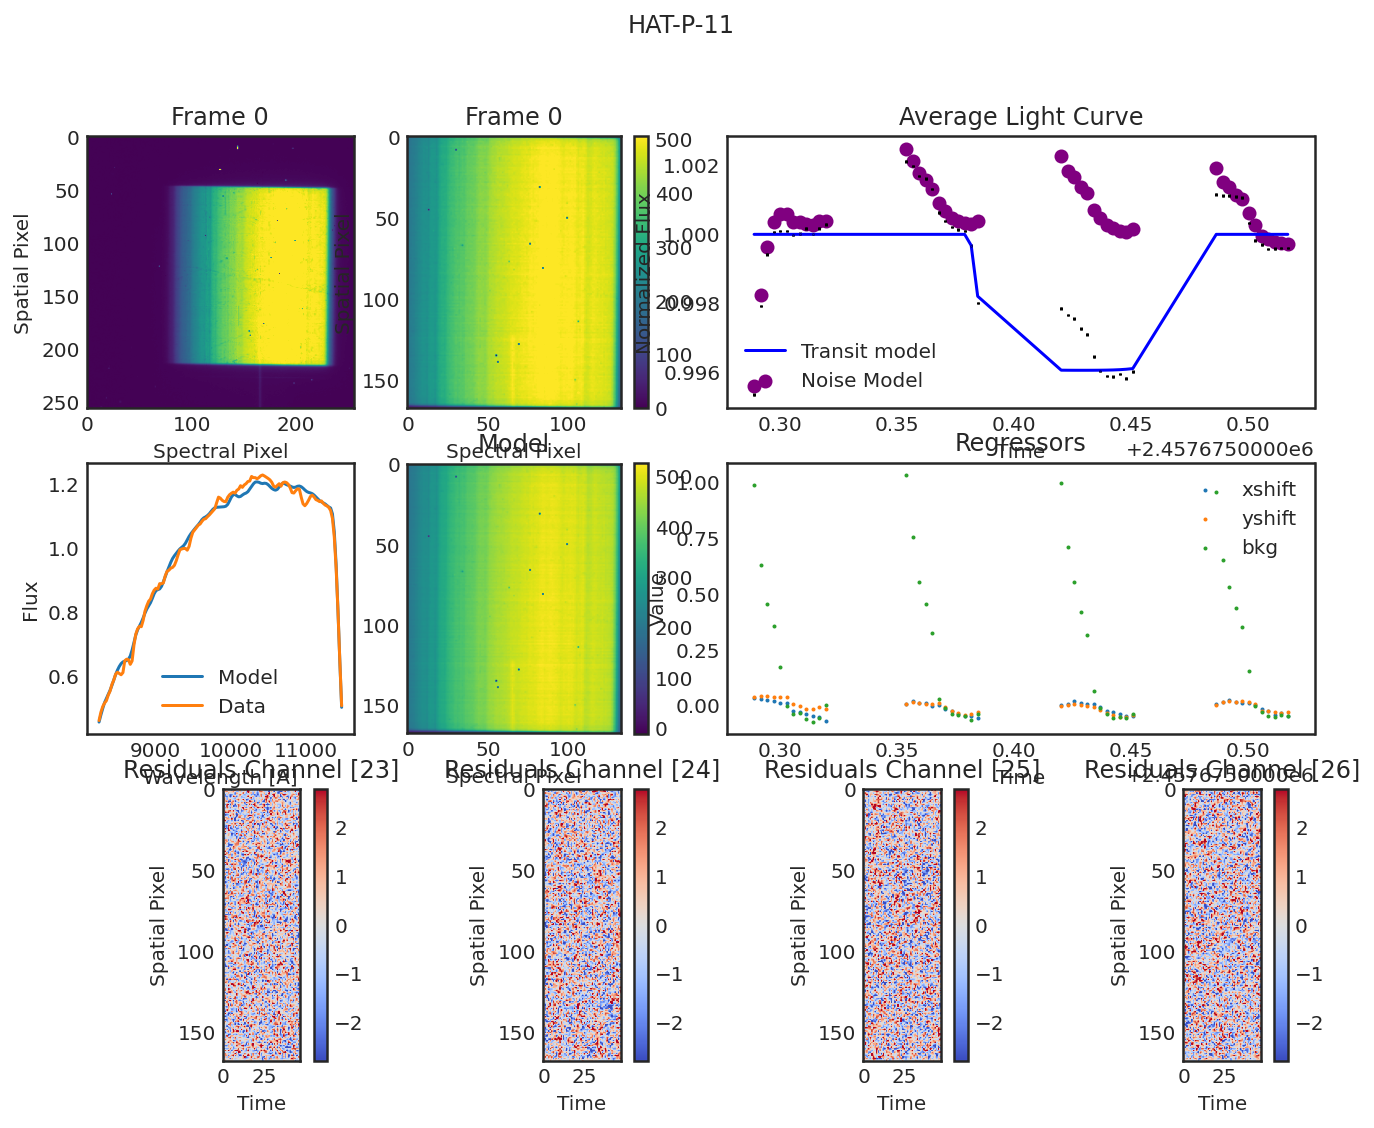

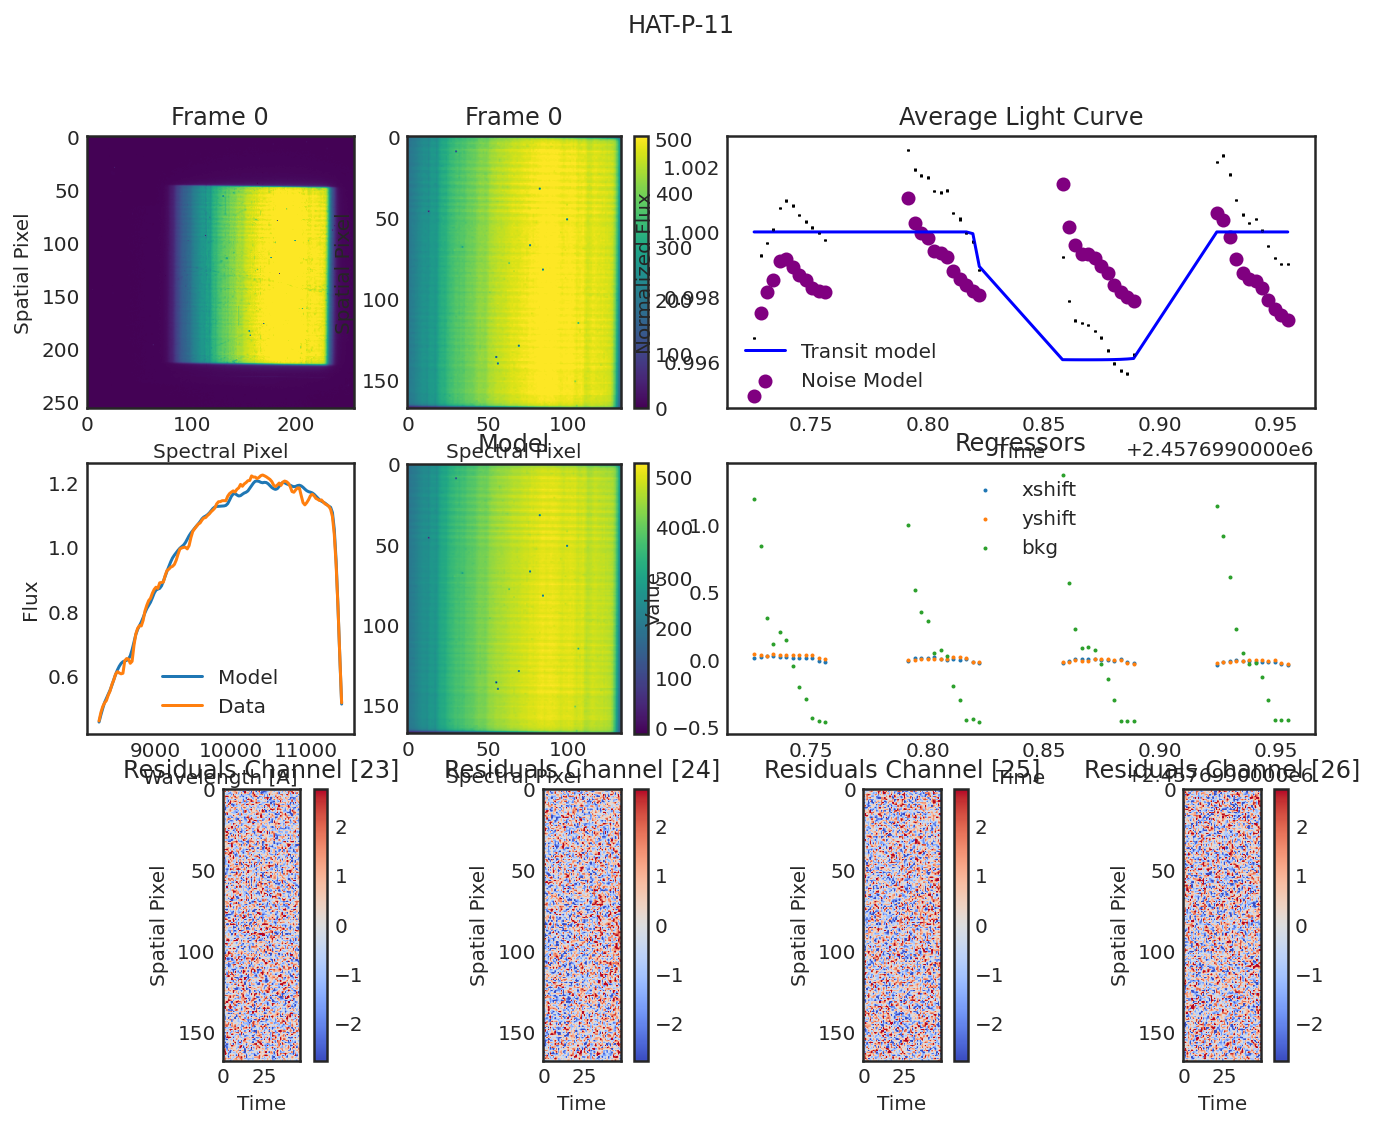

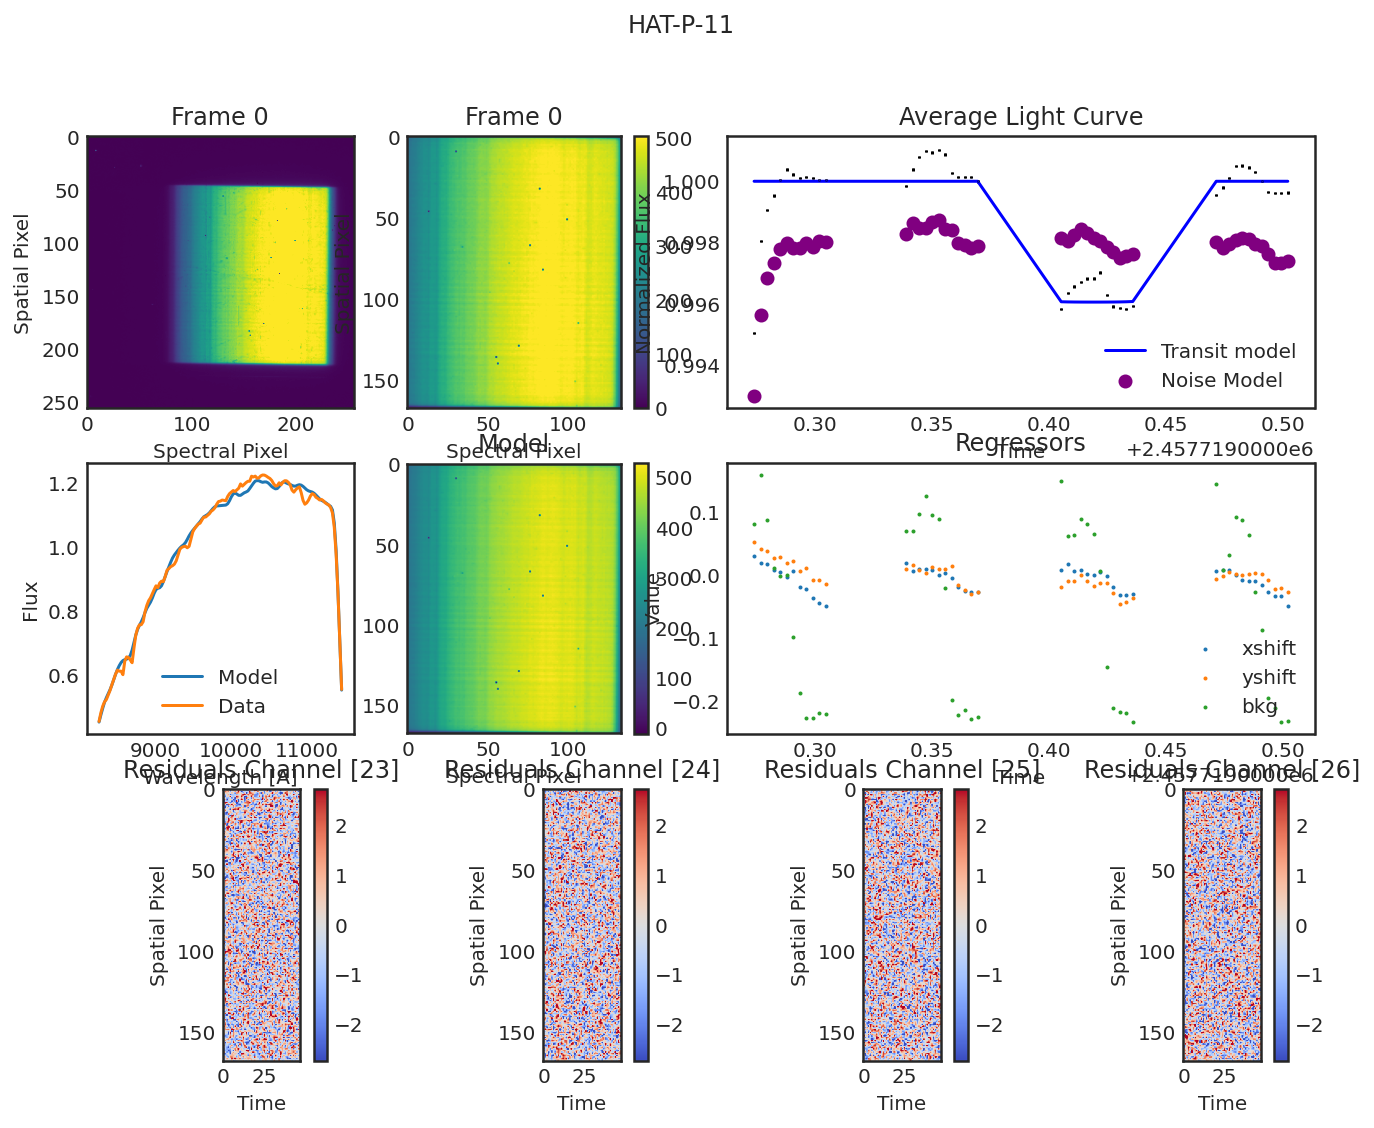

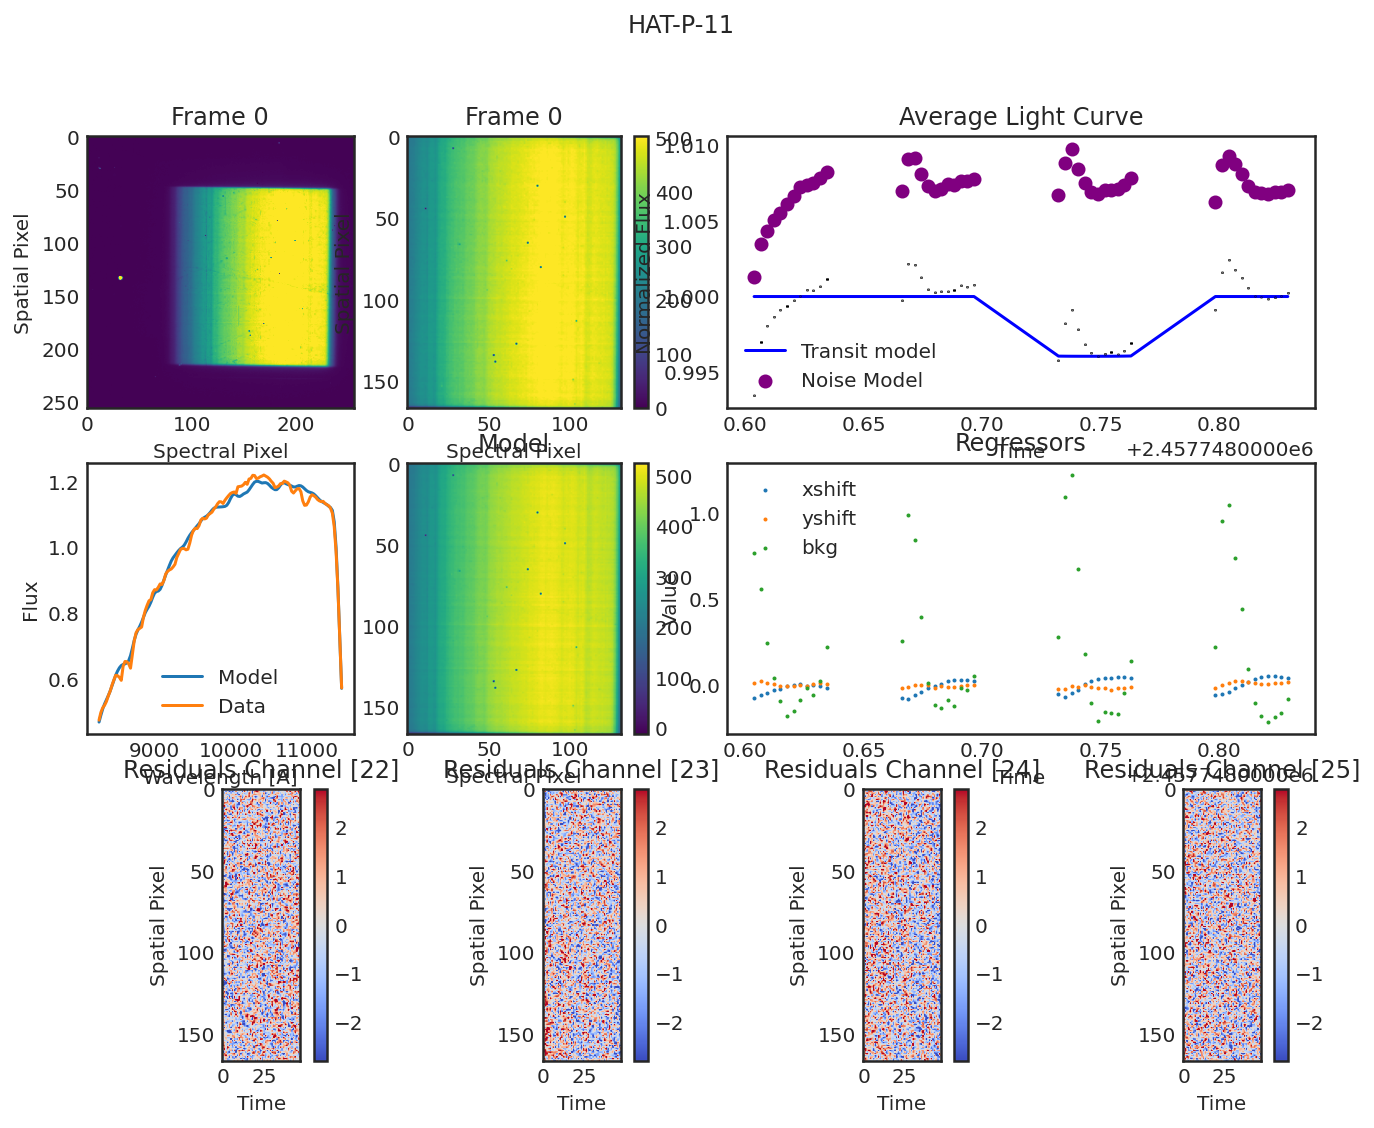

In [14]:
for visit in obs:
    visit.diagnose();
    plt.show();